In [8]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

import matplotlib.pyplot as plt

In [25]:
import os

# Usar ruta local del dataset (modificación mínima)
path = "/mnt/data"
print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/diabetes-dataset


In [26]:
import pandas as pd

print(path)

# Ver qué archivos hay
print(os.listdir(path))

data = pd.read_csv(os.path.join(path,'Autism_Screening_Data_Combined.csv'))
data


/kaggle/input/diabetes-dataset
['diabetes.csv']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Preprocesamiento básico con Pandas (manteniendo la sintaxis general del cuadernillo)
data = data.dropna().reset_index(drop=True)
data.head()


In [27]:
features = ["A1", "A2", "A3", "A4", "Age"]
target = "Class"

X = data[features].values
y = data[target].map({"YES":1, "NO":0}).values


In [28]:
def sigmoid(z):
    z = np.array(z)
    return 1 / (1 + np.exp(-z))

In [ ]:
# División 80/20 (los datos de prueba NO participan en el entrenamiento)
m = X.shape[0]
np.random.seed(42)
idx = np.random.permutation(m)
cut = int(0.8 * m)
train_idx, test_idx = idx[:cut], idx[cut:]

X_train, y_train = X[train_idx], y[train_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

# Para conservar la sintaxis del cuadernillo, reasignamos X,y a los datos de ENTRENAMIENTO
X, y = X_train, y_train
X.shape, y.shape


In [29]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)  # X ahora tiene n+1 columnas

In [30]:
def calcularCosto(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

In [31]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

In [39]:
alpha = 0.0001
num_iters = 10000
theta = np.zeros(n + 1)

theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

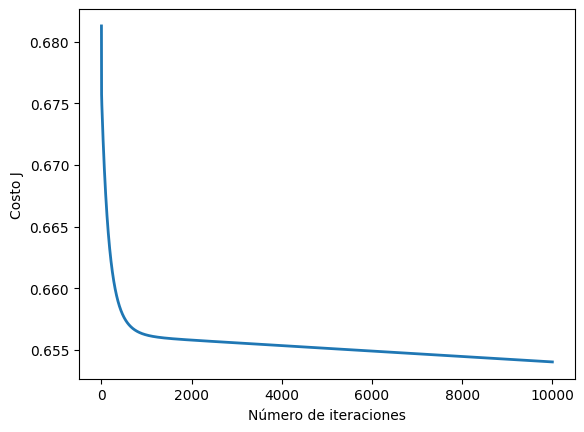

Theta calculado por descenso por gradiente: [-0.04724846  0.00948872 -0.03501601 -0.01263562  0.00531   ]


In [40]:
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.show()

print('Theta calculado por descenso por gradiente:', theta)

In [34]:
X_sample = np.array([1, 1, 1, 1, 0, 16])  # [bias, A1, A2, A3, A4, Age]
prediccion = sigmoid(np.dot(X_sample, theta))
print('Probabilidad de diabetes para este paciente: {:.2f}'.format(prediccion))


Probabilidad de diabetes para este paciente: 0.37


In [ ]:
# Evaluación en el 20% de PRUEBA (demostración de efectividad)
m_test = X_test.shape[0]
X_test_bias = np.concatenate([np.ones((m_test, 1)), X_test], axis=1)
probs = sigmoid(X_test_bias.dot(theta.T))
y_pred = (probs >= 0.5).astype(int)
accuracy = (y_pred == y_test).mean()
tp = int(((y_pred==1) & (y_test==1)).sum())
tn = int(((y_pred==0) & (y_test==0)).sum())
fp = int(((y_pred==1) & (y_test==0)).sum())
fn = int(((y_pred==0) & (y_test==1)).sum())
print(f'Exactitud (accuracy) en prueba: {accuracy:.3f}')
print(f'Confusion matrix -> TP:{tp}  TN:{tn}  FP:{fp}  FN:{fn}')
